In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.DataFrame({'Name': ['Vu Truong', 'Quang Huynh', 'Anh Ngo', 'Thanh Nguyen'],
                    'Roll No': ['BS20DSY037', 'BS20DSY027', 'BS20DSY035', 'BS20DSY029']}, index=[1,2,3,4])

,Name,Roll No
1,Vu Truong,BS20DSY037
2,Quang Huynh,BS20DSY027
3,Anh Ngo,BS20DSY035
4,Thanh Nguyen,BS20DSY029


https://www.kaggle.com/shubh0799/churn-modelling

# SS

In [8]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [14]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


<AxesSubplot:>

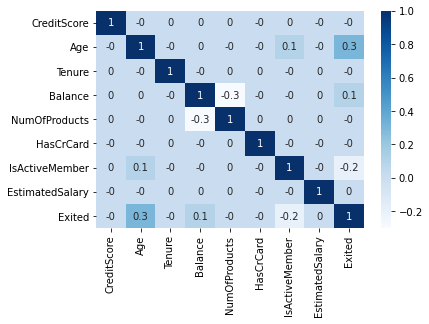

In [15]:
sns.heatmap(cor_matrix, annot = True, cmap='Blues')

# Exploratory Data Analysis

We divide independent variables into 2 groups: numerical and categorical in order to draw appropriate graph for each

**Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary**

**Categorical: HasCrCard, IsActiveMember, Gender, Geography**


## Continuous

### Histogram

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


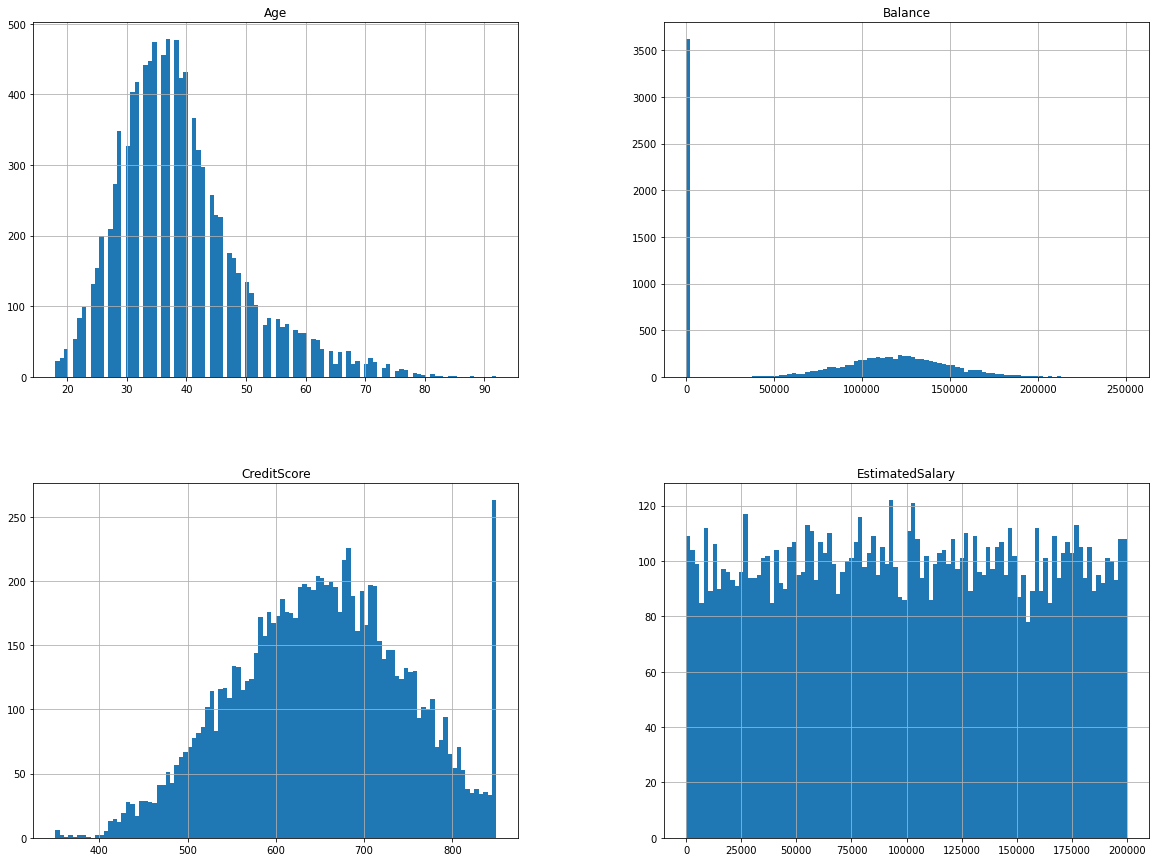

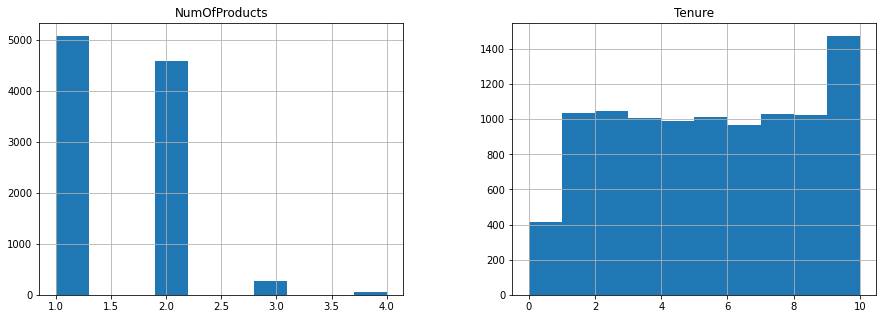

In [16]:
df.hist(column = ['CreditScore','Age','Balance','EstimatedSalary'],bins=100, figsize=(20, 15))
df.hist(column = ['Tenure','NumOfProducts'], figsize = (15,5))
plt.show()

The histogram illustrates the shape of each variable:
- Aldult customers (25-45) is popular in this dataset
- Above 1/3 number of customer has no money left with them

### Boxplot

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore           AxesSubplot(0.125,0.657941;0.352273x0.222059)
Age                AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Balance               AxesSubplot(0.125,0.391471;0.352273x0.222059)
EstimatedSalary    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Tenure                   AxesSubplot(0.125,0.125;0.352273x0.222059)
NumOfProducts         AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

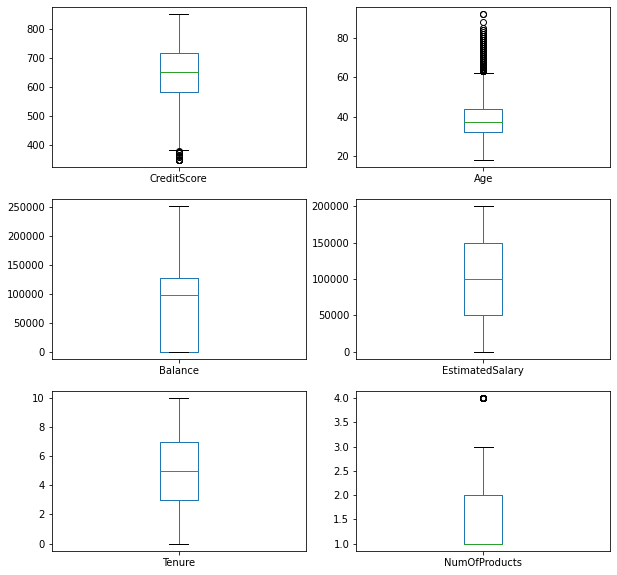

In [17]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure','NumOfProducts']].plot.box(subplots = True, layout=(3,2), figsize=(10, 10))

The box plot tells us the mean, interquantile range as well as outlier (if possible). We can notice Age has the highest outliers, followed by CreditScore and NumOfProducts

## Categorical

### Bar chart

We plot char chart for categorical variable which is group by 'Exited' variable

<AxesSubplot:xlabel='Exited', ylabel='count'>

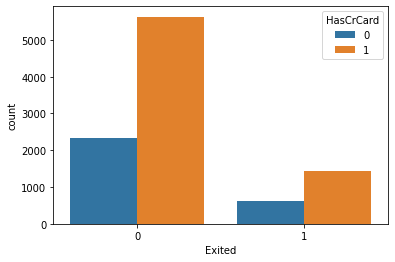

In [18]:
sns.countplot(x='Exited', hue='HasCrCard', data=df)

Those who has Credit Card tend to stay

<AxesSubplot:xlabel='Exited', ylabel='count'>

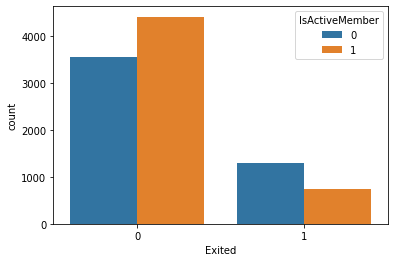

In [19]:
sns.countplot(x='Exited', hue='IsActiveMember', data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

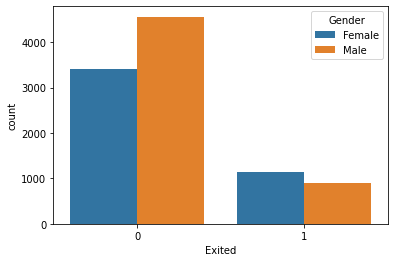

In [20]:
sns.countplot(x='Exited', hue='Gender', data=df)

The ratio of Male and Female in exited customer is nearly 1

<AxesSubplot:xlabel='Exited', ylabel='count'>

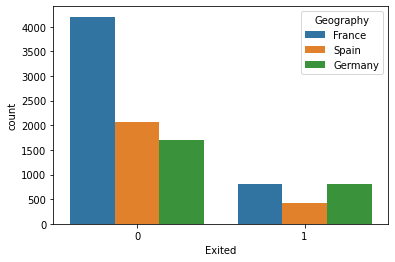

In [21]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [22]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


- On average, customers who left had higher Balance than that of those who stayed.
- Younger customers tend to stay compared to older customers.
- The time interact with company seems have no effect on customer's decision.

# Data Cleaning and Preparation

## Data Cleaning

### Gender

Gender has 2 unique values Male and Female. We convert it into binary number which 0 and 1 represent for Female and Male respectively.

In [23]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### Geography

There are 3 countries in Geography: France, Germany and Spain. We use dummy variable to convert into indicator variable.

In [24]:
country_dummies = pd.get_dummies(df['Geography'])

country_dummies.head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [25]:
df = pd.DataFrame.join(df, country_dummies)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


Since we have 3 new columns represent for countries, we remove 'Geography' from our dataset.

When consider France, Germany, Spain, one is dependent on the rest of two. It means that when the value of France and Germany is known, we can easily determine such value for Spain. Then we can randomly drop one of three columns. In this case, we drop Spain.

In [26]:
df.drop(['Geography', 'Spain'], axis=1, inplace=True)

df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


We check information again to make sure that all data type are numerical

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


## Preparation

In [28]:
from scipy import stats

In [29]:
for i in df.columns:
    print(i, ':', len(df[np.abs(stats.zscore(df[i])) > 3][i]))

CreditScore : 8
Gender : 0
Age : 133
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0
France : 0
Germany : 0


There are totally 201 outliers we need to deal with

The box plot of columns which has outliers:

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore         AxesSubplot(0.125,0.125;0.227941x0.755)
Age              AxesSubplot(0.398529,0.125;0.227941x0.755)
NumOfProducts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

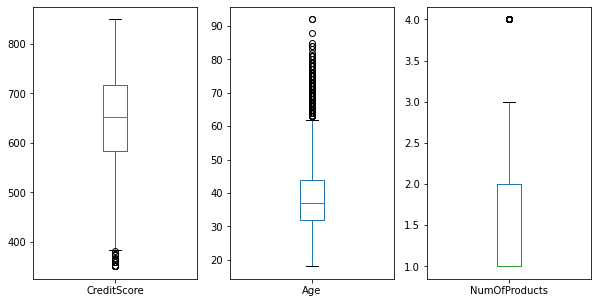

In [30]:
df[['CreditScore', 'Age','NumOfProducts']].plot.box(subplots = True, layout=(1,3), figsize=(10, 5))

**Dealing with outlier**

We deal with outliers by deleting row which has value more than 3 standard deviation from the mean. In other words, the row is remained when absolute Z-score is less than 3

In [31]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


As the result, there are only 9799 sample left and 201 datapoints that do not meet standards, are classified as extreme outliers and removed from the  dataset (2% reduction)

**reindex**

After deleting outliers, we reset index to avoid miss-indexing

In [32]:
index=pd.Index([i for i in range(9799)])

df.index = index

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9794,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9795,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9796,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9797,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# Fit models

In [33]:
# Splitting into training test and test set
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [34]:
from sklearn import model_selection
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
results=[]
names=[]
seed=7

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.794666(0.017161)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CARD:0.785277(0.010980)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN:0.766501(0.016740)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA:0.821609(0.016795)
NB:0.794803(0.018506)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM:0.798477(0.018555)


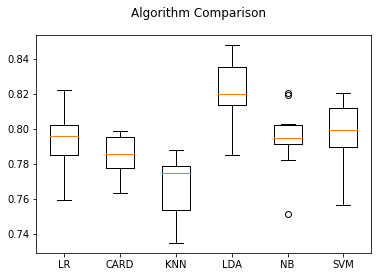

In [36]:
# Compare accuracy using boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**But**

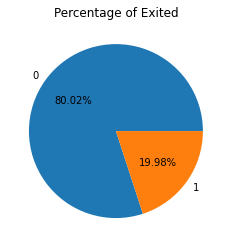

In [37]:
plt.pie(df['Exited'].value_counts(), autopct = '%1.2f%%', labels=[0, 1])
plt.title('Percentage of Exited')
plt.show()

unbalance -> cannot use

In [38]:
#Define x and y axis
x = X_test
y_true = np.array(y_test)

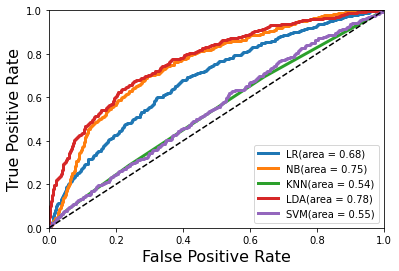

<Figure size 720x432 with 0 Axes>

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Logistic Regression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, x, y_true, method='decision_function',cv=10)

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_true,y_score_lr)


# GaussianNB

gnb = GaussianNB()
gnb.fit(x,y_true)
gnb_results = cross_val_score(gnb,x,y_true,scoring='accuracy')
y_score_gnb = cross_val_predict(gnb,x,y_true,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
#from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])

# SVC
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='decision_function',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc)


# ROC Curve for the models above
#plt.plot(nb_FPr, nb_TPr, linewidth = 3, label = 'GaussianNB (area = %0.2f)' % nb_roc_auc)
plt.plot(fpr_lr, tpr_lr, linewidth = 3, label='LR(area = %0.2f)' % roc_auc_score(y_true,y_score_lr))
plt.plot(fpr_gnb, tpr_gnb, linewidth = 3, label='NB(area = %0.2f)' % roc_auc_score(y_true,y_score_gnb[:,1]))
plt.plot(fpr_knn, tpr_knn, linewidth = 3, label='KNN(area = %0.2f)' % roc_auc_score(y_true,y_score_knn[:,1]))
plt.plot(fpr_lda, tpr_lda, linewidth = 3, label='LDA(area = %0.2f)' % roc_auc_score(y_true,y_score_lda[:,1]))
plt.plot(fpr_svc, tpr_svc, linewidth = 3, label='SVM(area = %0.2f)' % roc_auc_score(y_true,y_score_svc))


plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()

LDA, NB, LR, SVM, KNN

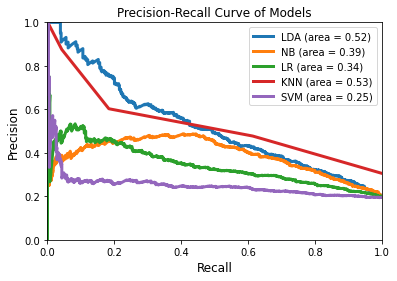

<Figure size 1080x1080 with 0 Axes>

In [40]:
# Plot Precision-Recall curve
from sklearn.metrics import plot_roc_curve, precision_recall_curve, roc_curve, auc, f1_score

#LDA
lda_precision, lda_recall, threshold = precision_recall_curve(y_test, lda.predict_proba(X_test)[:,1])
lda_f1 = f1_score(y_test,lda.predict(X_test))
lda_roc_auc = auc(lda_recall, lda_precision)

#NB
gnb_precision, gnb_recall, threshold = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:,1])
gnb_f1 = f1_score(y_test,gnb.predict(X_test))
gnb_roc_auc = auc(gnb_recall, gnb_precision)

#LR
lr_precision, lr_recall, threshold = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_f1 = f1_score(y_test,lr.predict(X_test))
lr_roc_auc = auc(lr_recall, lr_precision)

#KNN
knc_precision, knc_recall, threshold = precision_recall_curve(y_test, knc.predict_proba(X_test)[:,1])
knc_f1 = f1_score(y_test,knc.predict(X_test))
knc_roc_auc = auc(knc_recall, knc_precision)

#SVC
svc_precision, svc_recall, threshold = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])
svc_f1 = f1_score(y_test,svc.predict(X_test))
svc_roc_auc = auc(svc_recall, svc_precision)


plt.plot(lda_recall, lda_precision, linewidth = 3,label = 'LDA (area = %0.2f)' % lda_roc_auc)
plt.plot(gnb_recall, gnb_precision, linewidth = 3,label = 'NB (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_recall, lr_precision, linewidth = 3,label = 'LR (area = %0.2f)' % lr_roc_auc)
plt.plot(knc_recall, knc_precision, linewidth = 3,label = 'KNN (area = %0.2f)' % knc_roc_auc)
plt.plot(svc_recall, svc_precision, linewidth = 3,label = 'SVM (area = %0.2f)' % svc_roc_auc)


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve of Models')
plt.legend(loc = "upper right")
plt.figure(figsize = (15,15))
plt.show()

KNN, LDA, NB, LR, SVM

# Fit Model

## LDA

In [41]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model 

LinearDiscriminantAnalysis()

In [42]:
print(ldamodel.classes_)
print(ldamodel.intercept_)
pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-4.09773438]


,Coeff
CreditScore,-4.897031e-04
Gender,-5.779125e-01
Age,9.857703e-02
Tenure,-1.333484e-02
Balance,1.267220e-06
NumOfProducts,-3.836744e-01
HasCrCard,-3.073800e-02
IsActiveMember,-9.880782e-01
EstimatedSalary,5.975045e-07
France,-6.681504e-02


In [43]:
ldamodel.predict_proba(X_test)

array([[0.97891506, 0.02108494],
       [0.91287517, 0.08712483],
       [0.96844528, 0.03155472],
       ...,
       [0.8329088 , 0.1670912 ],
       [0.91259979, 0.08740021],
       [0.51237452, 0.48762548]])

In [44]:
confusion_matrix(y_test, ldamodel.predict(X_test))

array([[1884,   89],
       [ 347,  130]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

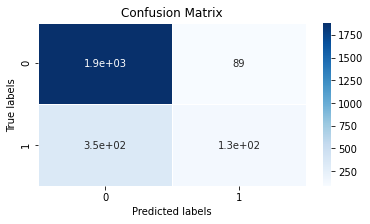

In [45]:
#Linear Discriminant Analysis
cm2=confusion_matrix(y_test,ldamodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [46]:
LDAreport = classification_report(y_test, ldamodel.predict(X_test))
print(LDAreport)

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1973
           1       0.59      0.27      0.37       477

    accuracy                           0.82      2450
   macro avg       0.72      0.61      0.63      2450
weighted avg       0.80      0.82      0.79      2450



# LR

In [47]:
Logisticmodel = LogisticRegression() #create instance of Logistic Regression with penalty=l2 by default
Logisticmodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model

LogisticRegression()

In [48]:
print(Logisticmodel.classes_)
print(Logisticmodel.intercept_)
pd.DataFrame(Logisticmodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-0.00025023]


,Coeff
CreditScore,-0.005581
Gender,-0.001271
Age,0.053135
Tenure,-0.002197
Balance,0.000003
NumOfProducts,-0.001099
HasCrCard,-0.000235
IsActiveMember,-0.001690
EstimatedSalary,-0.000001
France,-0.001013


In [49]:
Logisticmodel.predict_proba(X_test)

array([[0.92855401, 0.07144599],
       [0.80125258, 0.19874742],
       [0.77694812, 0.22305188],
       ...,
       [0.62276663, 0.37723337],
       [0.73360707, 0.26639293],
       [0.70167381, 0.29832619]])

In [50]:
confusion_matrix(y_test, Logisticmodel.predict(X_test))

array([[1920,   53],
       [ 430,   47]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

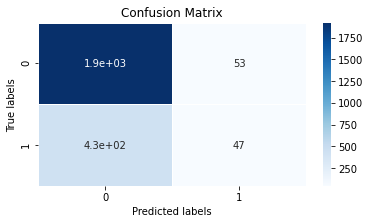

In [51]:
#Logistic Regression
cm1=confusion_matrix(y_test, Logisticmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [52]:
#Classification report
Logisticreport = classification_report(y_test, Logisticmodel.predict(X_test))
print(Logisticreport)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1973
           1       0.47      0.10      0.16       477

    accuracy                           0.80      2450
   macro avg       0.64      0.54      0.53      2450
weighted avg       0.75      0.80      0.75      2450



## NB

In [53]:
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)

GaussianNB()

In [54]:
NBmodel.predict_proba(X_test)

array([[0.93612029, 0.06387971],
       [0.89428886, 0.10571114],
       [0.870792  , 0.129208  ],
       ...,
       [0.80411267, 0.19588733],
       [0.9032408 , 0.0967592 ],
       [0.50651063, 0.49348937]])

In [55]:
NBMatrix = confusion_matrix(y_test, NBmodel.predict(X_test))
NBMatrix

array([[1876,   97],
       [ 402,   75]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

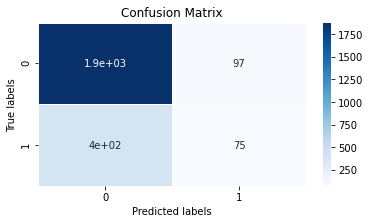

In [56]:
predictions2 = NBmodel.predict(X_test)
cm2 = confusion_matrix(y_test, NBmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [57]:
#Classification report
NBreport = classification_report(y_test, NBmodel.predict(X_test))
print(NBreport)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1973
           1       0.44      0.16      0.23       477

    accuracy                           0.80      2450
   macro avg       0.63      0.55      0.56      2450
weighted avg       0.75      0.80      0.76      2450



# KNN

In [58]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
#Checking model's performance
knn.predict_proba(X)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

In [60]:
KNNpredict = knn.predict(X_test)
KNNpredict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
#Confusion matrix
KNNmatrix = confusion_matrix(y_test, KNNpredict)
KNNmatrix

array([[1738,  235],
       [ 419,   58]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

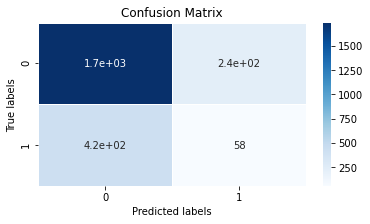

In [62]:
predictions3 = knn.predict(X_test)
cm3 = confusion_matrix(y_test, knn.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm3, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [63]:
KNNreport = classification_report(y_test, knn.predict(X_test))
print(KNNreport)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1973
           1       0.20      0.12      0.15       477

    accuracy                           0.73      2450
   macro avg       0.50      0.50      0.50      2450
weighted avg       0.69      0.73      0.71      2450



# Conclusion

      pre     recall
LDA   0.59    0.27
LR    0.47    0.1
NB    0.44    0.16
KNN   0.2     0.12

In [64]:
ROC: LDA, NB, LR, SVM, KNN
P-C: KNN, LDA, NB, LR, SVM

SyntaxError: invalid syntax (<ipython-input-64-548b4f4ca6ea>, line 1)

# Additional Information

## Tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, y_train)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names = df.drop('Exited', axis=1).columns, class_names = np.unique(df['Exited']).astype('str'), filled = True)

## Feature Important for LDA

In [ ]:
df1 = pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])
df1

In [ ]:
## add column of 1's at the beginning of your X_train matrix
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
print(X_design.shape)

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
predProbs = ldamodel.predict_proba(X_train)
V = np.diagflat(np.product(predProbs, axis=1))
print(V)

In [ ]:
# Covariance matrix
covLDA = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))

In [ ]:
#Calculate sd
parameters_sd = np.sqrt(np.diag(covLDA))
print("Standard errors: ", parameters_sd)

parameters_sd = parameters_sd.reshape(12,1)

In [ ]:
df1['Sd'] = parameters_sd[1:]
df1

In [ ]:
# Wald statistic (coefficient / s.e.) 
logitParams = np.insert(ldamodel.coef_, 0, ldamodel.intercept_)
chi = (logitParams / np.sqrt(np.diag(covLDA))) ** 2
print("Wald statistics: ", chi)

In [ ]:
logitParams

In [ ]:
df1['Chi square'] = chi[1:]

df1

In [ ]:
from scipy import stats
df1['P_value']=(1-stats.chi2.cdf(df1['Chi square'] , 1)).round(4)*2
df1

In [ ]:
X_train1 = X_train[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]
X_test1 = X_test[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]

In [ ]:
LAmodel2 = LinearDiscriminantAnalysis()

In [ ]:
LAmodel2.fit(X_train1,y_train)

In [ ]:
print(LAmodel2.score(X_test1, y_test))

In [ ]:
Logisticmatrix1 = confusion_matrix(y_test, LAmodel2.predict(X_test1))
Logisticmatrix1

In [ ]:
LDAreport1 = classification_report(y_test, LAmodel2.predict(X_test1))
print(LDAreport1)

Markdown and LaTeX:  𝛼2

# F1-score

In [136]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        accuracy = (tp+tn) / (tn+fp+fn+tp)
        f1 = (2*recall*precision)/(recall+precision)
        if (f1 > 0.48):
            bestthresh.append([recall, f1, accuracy, i/100])
    return bestthresh

In [138]:
a = pd.DataFrame(optimize_threshold(lda), columns=['recall', 'f1', 'accuracy', 'threshold'])
a

<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-136-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision =

,recall,f1,accuracy,threshold
0,0.750524,0.481830,0.685714,0.16
1,0.727463,0.483961,0.697959,0.17
2,0.706499,0.486291,0.709388,0.18
3,0.693920,0.495138,0.724490,0.19
4,0.668763,0.495342,0.734694,0.20
5,0.649895,0.497992,0.744898,0.21
6,0.637317,0.502895,0.754694,0.22
7,0.618449,0.501274,0.760408,0.23
8,0.603774,0.503057,0.767755,0.24
9,0.580713,0.494643,0.768980,0.25


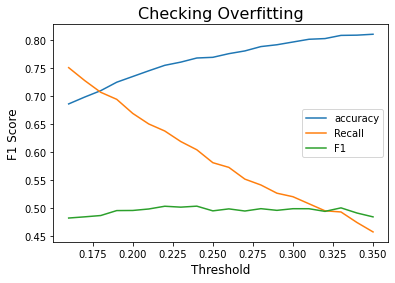

In [142]:
plt.plot(a.iloc[:, 3], a.iloc[:, 2], label = 'accuracy')
plt.plot(a.iloc[:, 3], a.iloc[:, 0], label = 'Recall')
plt.plot(a.iloc[:, 3], a.iloc[:, 1], label = 'F1')
plt.xlabel('Threshold',fontsize = 12)
plt.ylabel('F1 Score',fontsize = 12)
plt.title('Checking Overfitting', fontsize = 16)
plt.legend()

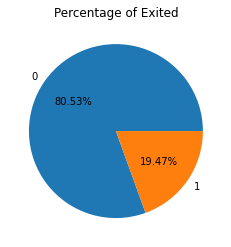

In [145]:
plt.pie(y_test.value_counts(), autopct = '%1.2f%%', labels=[0, 1])
plt.title('Percentage of Exited')
plt.show()

In [94]:
#a[:, 1]
np.argmax(a[:50, 1])

23

In [80]:
yhat = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.239482, F-Score=0.505


In [111]:
from math import *
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

In [115]:
tpr

array([0.        , 0.00209644, 0.03983229, 0.03983229, 0.04192872,
       0.04192872, 0.05660377, 0.05660377, 0.06289308, 0.06289308,
       0.08595388, 0.08595388, 0.09014675, 0.09014675, 0.09224319,
       0.09224319, 0.10691824, 0.10691824, 0.11320755, 0.11320755,
       0.11740042, 0.11740042, 0.12159329, 0.12159329, 0.13626834,
       0.13626834, 0.15303983, 0.15303983, 0.1572327 , 0.1572327 ,
       0.16142558, 0.16142558, 0.16352201, 0.16352201, 0.16981132,
       0.16981132, 0.17190776, 0.17190776, 0.17610063, 0.17610063,
       0.18238994, 0.18238994, 0.18448637, 0.18448637, 0.18867925,
       0.18867925, 0.19287212, 0.19287212, 0.19706499, 0.19706499,
       0.20125786, 0.20125786, 0.20545073, 0.20545073, 0.20754717,
       0.20754717, 0.21383648, 0.21383648, 0.21593291, 0.21593291,
       0.21802935, 0.21802935, 0.22012579, 0.22012579, 0.22222222,
       0.22222222, 0.22431866, 0.22431866, 0.22641509, 0.22641509,
       0.22851153, 0.22851153, 0.23060797, 0.23060797, 0.23270

In [121]:
len(np.ones(len(fpr))-fpr)

638

In [126]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr*(np.ones(len(fpr))-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.189545, G-Mean=0.715


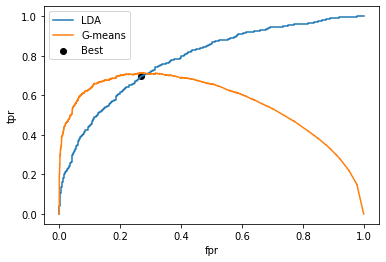

In [128]:
plt.plot(fpr, tpr, label='LDA')
plt.plot(fpr, gmeans, label='G-means')
plt.scatter(fpr[ix], tpr[ix], color='black', label='Best')
# axis labels
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
# show the plot
plt.show()

In [130]:
y2_predict = np.where(yhat>thresholds[ix], 1, 0)
y2_predict

array([0, 0, 0, ..., 0, 0, 1])

In [131]:
confusion_matrix(y_test, y2_predict)

array([[1442,  531],
       [ 144,  333]], dtype=int64)

In [ ]:
1591,  382],
[ 188,  289

In [132]:
print(classification_report(y_test, y2_predict))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1973
           1       0.39      0.70      0.50       477

    accuracy                           0.72      2450
   macro avg       0.65      0.71      0.65      2450
weighted avg       0.81      0.72      0.75      2450



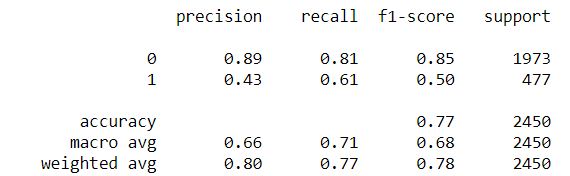

In [98]:
thresholds

array([0.01397535, 0.01422771, 0.01446693, ..., 0.91296166, 0.9161263 ,
       0.92069939])

In [106]:
th = thresholds[ix]
th

0.239481905292109

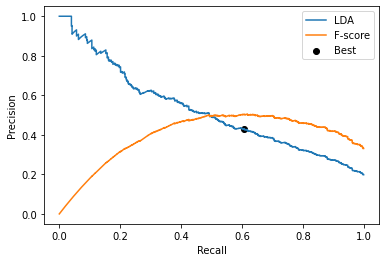

In [107]:
plt.plot(recall, precision, label='LDA')
plt.plot(recall, fscore, label='F-score')
plt.scatter(recall[ix], precision[ix], color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [108]:
lda.predict_proba(X_test)

array([[0.98247   , 0.01753   ],
       [0.93202536, 0.06797464],
       [0.97854015, 0.02145985],
       ...,
       [0.85999407, 0.14000593],
       [0.9134353 , 0.0865647 ],
       [0.47795035, 0.52204965]])

In [114]:
y1_predict = np.where(yhat>th, 1, 0)
y1_predict

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test, model.predict(X_test)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

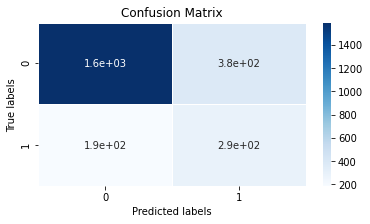

In [115]:
cm = confusion_matrix(y_test, y1_predict)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [116]:
cm

array([[1591,  382],
       [ 188,  289]], dtype=int64)

In [117]:
print(classification_report(y_test, y1_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1973
           1       0.43      0.61      0.50       477

    accuracy                           0.77      2450
   macro avg       0.66      0.71      0.68      2450
weighted avg       0.80      0.77      0.78      2450



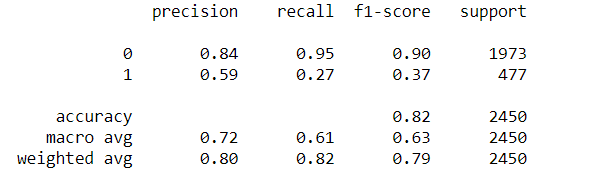

In [119]:
from sklearn.metrics import f1_score
yhat1 = lda.predict(X_test)
# evaluate the model
score = f1_score(y_test, yhat1)
print('F-Score: %.5f' % score)

F-Score: 0.38793
